**<font color=skyblue>講義補充程式碼（上課供學生觀摩之用）</font>**

載入影像資料檔（Yale 人臉資料）

In [1]:
import numpy as np
import scipy.io

D = scipy.io.loadmat('data/allFaces.mat')
print(D.keys())
X = D['faces'] # 32256 x 2410 each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = D['m'].item()
# m = D['m'] # depreciated
n = D['n'].item() # 192
n_persons = D['person'].item() # 38

dict_keys(['__header__', '__version__', '__globals__', 'faces', 'n', 'm', 'sub', 'nfaces', 'person'])


準備繪圖副程式

In [2]:
import matplotlib.pyplot as plt

def show_montage(X, n, m, h, w):
    '''
    X: image matrix in which each column represents an image
    n, m: image size n x m
    h, w : create an h x w montage image with figsize = (w,h)
    '''
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影像張數不到 w x h 張，用 0 向量補齊     
        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

展示所有人（38 人） 的第一張影像圖

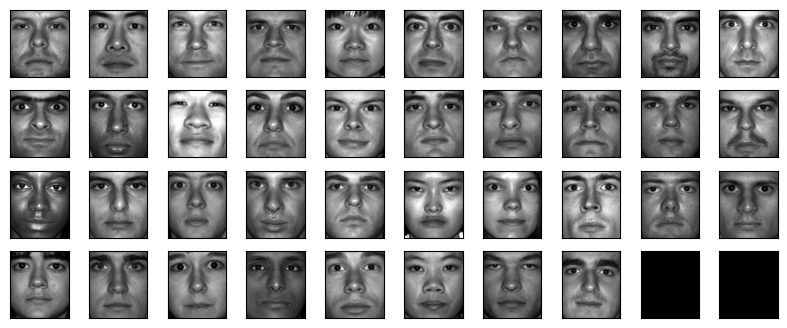

In [3]:
all_diff_persons = np.zeros((m*n, n_persons))
cnt = 0
for i in range(n_persons):
    all_diff_persons[:,i] = X[:,cnt]
    cnt = cnt + y[i]
# check all 38 different persons
show_montage(all_diff_persons, n, m, 4,10)

展示某個人的所有樣本影像

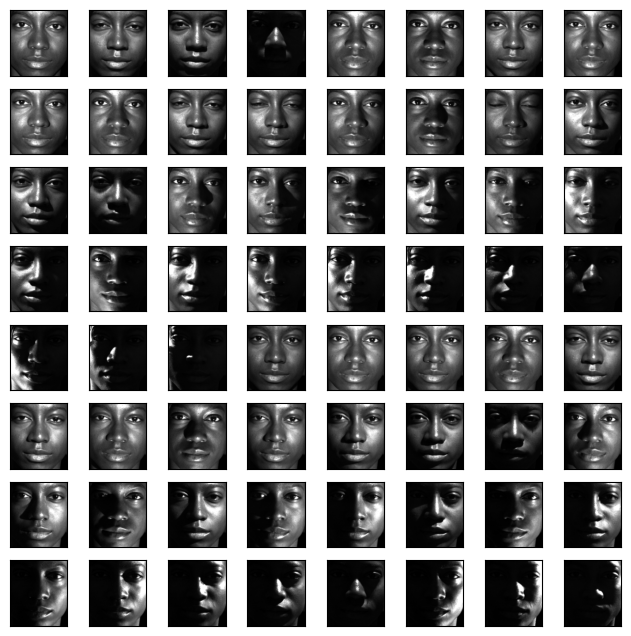

In [4]:
which_person = 20 # 0 ~ 37
start_col = y[0:which_person].sum()
end_col = start_col + y[which_person]
show_montage(X[:, start_col:end_col], n, m, 8, 8)

SVD 分解

In [5]:
from numpy.linalg import svd

avgFace = X.mean(axis=1).reshape(-1, 1)
X_avg = X - np.tile(avgFace, (1, X.shape[1]))
U, E, VT = svd(X_avg, full_matrices = False)
# U, E, VT = svd(X, full_matrices = False)

關於 svd 參數 full_matrix=True 或 False 的意思

In [12]:
import numpy as np
from numpy.linalg import svd

A = np.array([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 8, 9]])
# A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 8]])
# U, E, VT = svd(A, full_matrices = True)
U, E, VT = svd(A, full_matrices = False)

print(U)
print(E)
print(VT)
print(A.T @ U[:,0] / E[0]) # should be equal to VT[0]

[[ 0.25997557  0.78912873  0.55649668]
 [ 0.55311365  0.35069831 -0.7556957 ]
 [ 0.79150363 -0.50426832  0.34530488]]
[20.25708934  1.90424199  0.15554357]
[[ 0.39556303  0.47477445  0.51491295  0.59412437]
 [-0.70261885 -0.36885942  0.22971315  0.56347258]
 [-0.31600102  0.62332331 -0.65734049  0.28198384]]
[0.39556303 0.47477445 0.51491295 0.59412437]
